In this jupyter notebook you can find a data visualization project implemented in a data set that contains information about Shark Attacks.

All of the grphs below are implemented in order to demostrate wheter the next hypothesis are true:

All of the cleaning process below are implemented in order to demostrate wheter the next hypothesis are true:

    H1: Women who are attacked by sharks are more likely to die than men. 
    H2: In North America, most of the people attacked were surfing.
    H3: In 2018, persons in theirs 30s were the ones who experimented the bigger amount of attacks.
    

# 1. Import libraries

In [1]:
# This are the libraries used in this jupyter:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Importing the cleaning functions:
import src.visualization_functions as cf

# 2. We are going to import out dataframe.

In [2]:
df = pd.read_csv("data/clean_attacks.csv",encoding = "ISO-8859-1", index_col = 0) #To load the data csv

# 3. Display Configuration

In [3]:
# Matplotlib inline to visualize Matplotlib grahps:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [4]:
df.head()

,Year,Continent,Activity,Sex,Age,Fatal(Y/N)
0,2018,North America,Other,F,57,N
1,2018,North America,Other,F,11,N
2,2018,North America,Surf,M,48,N
3,2018,Oceania,Surf,M,NaN,N
4,2018,North America,Free Swimming/Diving,M,NaN,N


# 4. Visualization of Hyphotesis:

### H1: Women who are attacked by sharks are more likely to die than men. 

<AxesSubplot:xlabel='Fatal(Y/N)', ylabel='count'>

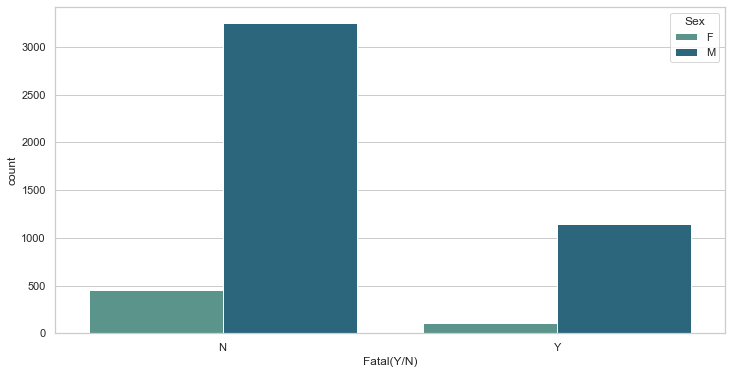

In [5]:
# First we are going to remove the category "Unknown" from both variables:
df_age = df[(df["Fatal(Y/N)"] != "UNKNOWN") & (df["Sex"] != "Unknown")]

# Second, we plot it:
sns.countplot(data=df_age, x="Fatal(Y/N)", hue="Sex", palette="crest")

This graph shows a representation of fatal results from shark attacks for both women and men.
As we can see, within those who have been killed (represented on the righy side of the visualization), more men has died. Being the total result for dead men around 1.000 cases while, less than 500 cases for women.

Thus, the first hypothesis 1 does not hold.

###  H2: In North America, most of the people attacked were surfing.

In [6]:
# First we are going to remove the category "Unknown" from both variables:
df_continent_activity = df[(df["Continent"] != "Unknown") & (df["Activity"] != "Unknown")]

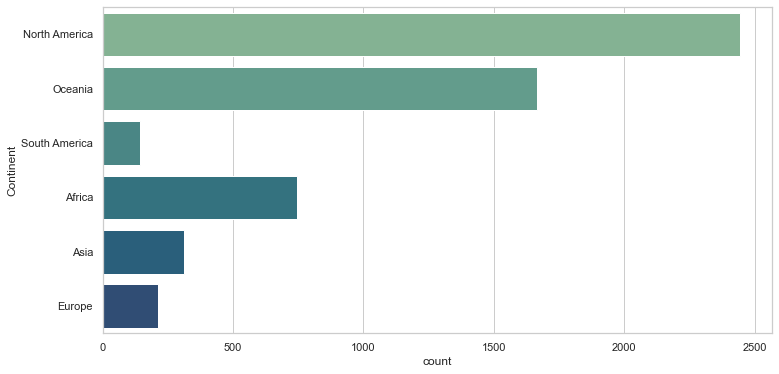

In [7]:
#visualizacion of continen variable
sns.countplot(y="Continent", data=df_continent_activity, palette="crest");

This graph shows a representation of the Continen Variable. As we can see, most cases have occur in North America and Oceania.

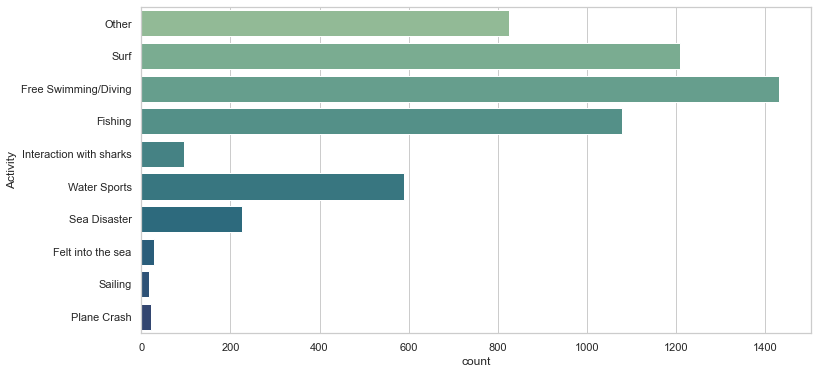

In [8]:
#visualizacion of activity variable
sns.countplot(y="Activity", data=df_continent_activity, palette="crest");

This graph shows a representation of the Activity variable. As we can denote frorm this representation, the majority of attacks have occur into those persons who where free swimming or divind.

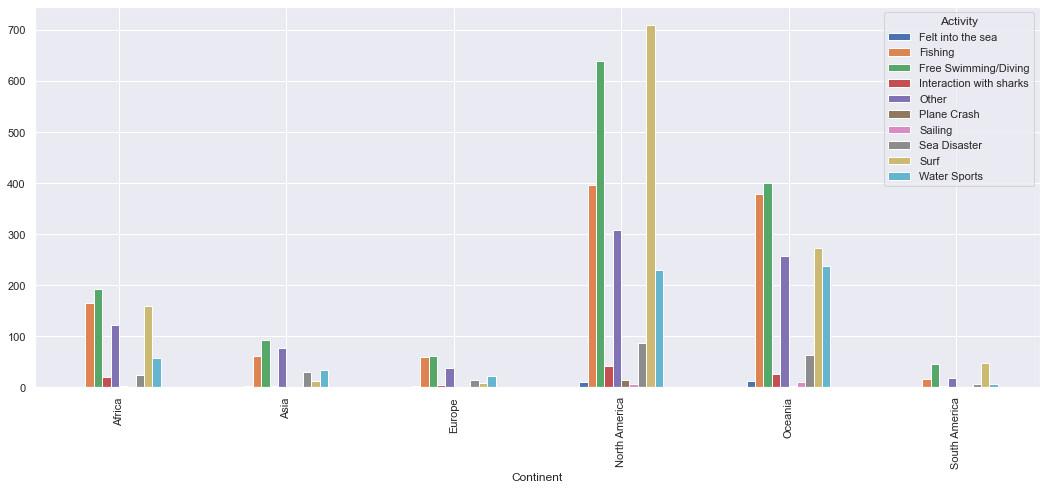

In [9]:
#Now, we plot it:
sns.set(rc={"figure.figsize": (18.,7.)})
continent_activity = df_continent_activity.groupby(["Continent", "Activity"])["Activity"].count().unstack().plot(kind="bar"),

plt.show()

This graph shows a representation of how the different acivities are distributed within the continents. As we have been able to confirm with the last graph, most cases have occured in North America.
Within North America, the activities that have caused more attacks are Surf, free swimming or diving and fishing respectively.

Thus, the first hypothesis 2 is confirmed.

### H3: In 2018, persons in theirs 30s were the ones who experimented the bigger amount of attacks.

In [10]:
# First we are going to remove the category "Unknown" from Year:
df_year = df[df["Year"] != "Unknown"]
df_year.head()

# we apply the funcion to convert values to int 
df_year["Year"] = df_year["Year"].apply(cf.clean_object)

# as we just want those values since 2015:
years = df_year[df_year["Year"] == 2018]


<ipython-input-10-27b30c96671a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["Year"] = df_year["Year"].apply(cf.clean_object)


In [11]:
# First we are going to remove the category "Unknown" from Age:
df_age = df[df["Age"] != ("Unknown")]
df_age.head()

# we apply the funcion to convert values to int 
df_age["Age"] = df_age["Age"].apply(cf.clean_object)

# as we just want those values bigger than 30:
age = df_age[df_age["Age"] > 30]

<ipython-input-11-f8c9463f5750>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["Age"] = df_age["Age"].apply(cf.clean_object)


In [12]:
total = df_year[(df_year["Year"] == 2018) & (df_age["Age"] > 30)]

<ipython-input-12-11e059c2d1d5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total = df_year[(df_year["Year"] == 2018) & (df_age["Age"] > 30)]


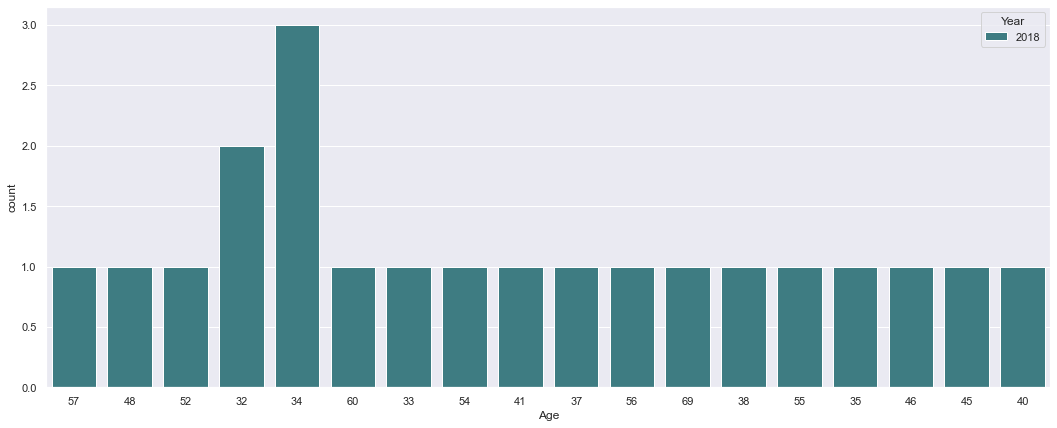

In [13]:
sns.countplot(data=total, x="Age", hue="Year", palette="crest");

In this graph we can see a representation of the ages of the people who were attacked in 2018.
As can be seen, people with 34 or 32 years old were the ones who received more attacks. 

Compared to the rest of the ages, we can see that those people in their 30s received the most attacks and therefore we can confirm hypothesis 3. 

# 5. Final Conclusions

1. In general, more men have been killed by shark attacks than women.
2. Continents where most shark attacks have occurred are North America, Oceania and Africa.
3. The activities that have caused the most shark attacks were: free swimming or diving, surfing and fishing.
4. In North America, which is the continent where most attacks have been recorded, most of the attacks were on people who were surfing.
5. In 2018, people in theis 30s experimented the bigger number of attacks.